In [ ]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import statsmodels.api as sm
import pylab as py

#In order to see all columns
pd.set_option('display.max_columns', None)


In [ ]:
df = pd.read_csv("/Titanic.csv")

print(len(df))
df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Thus at an overall we see!

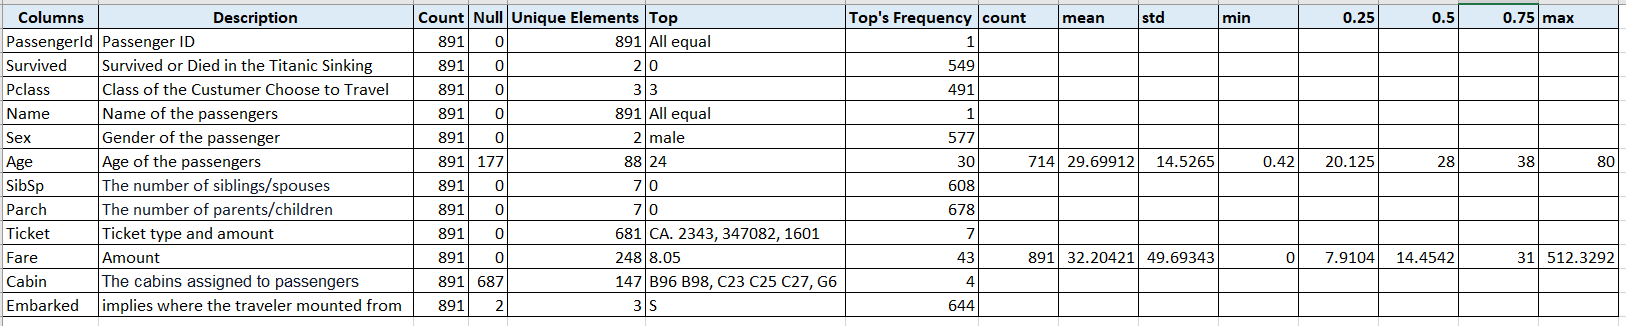

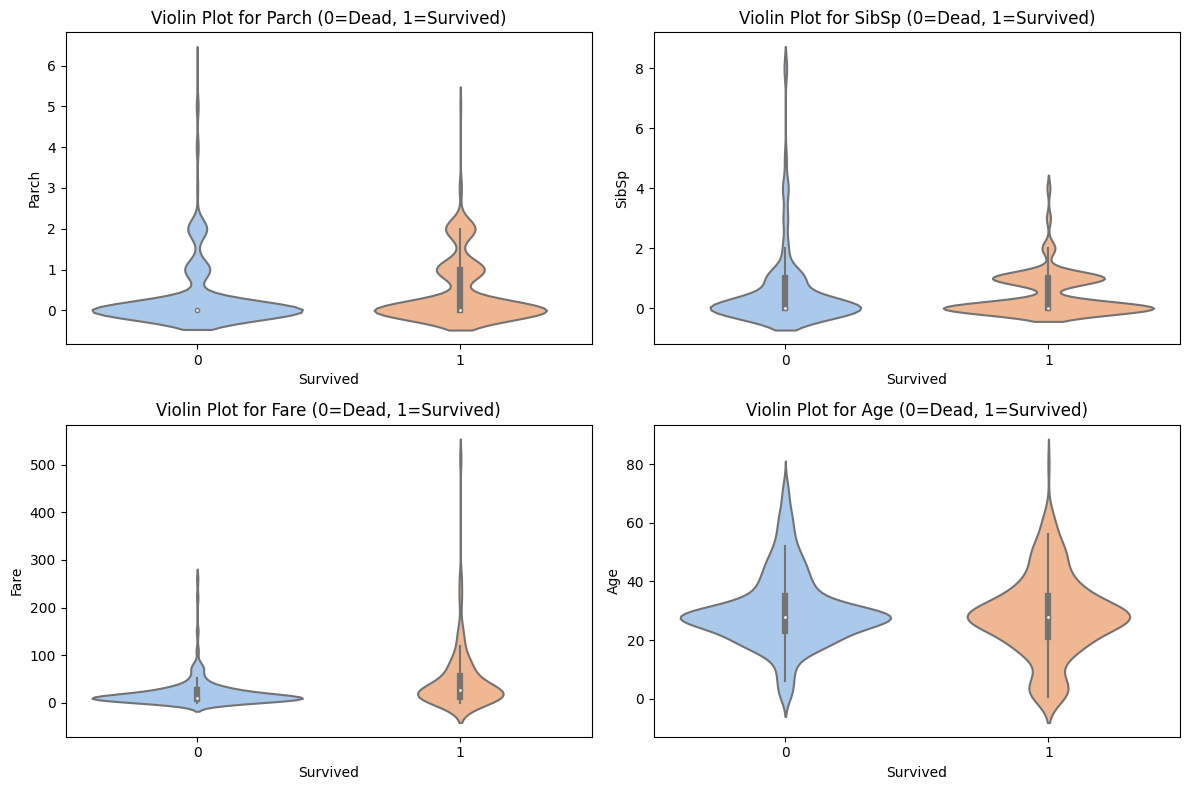

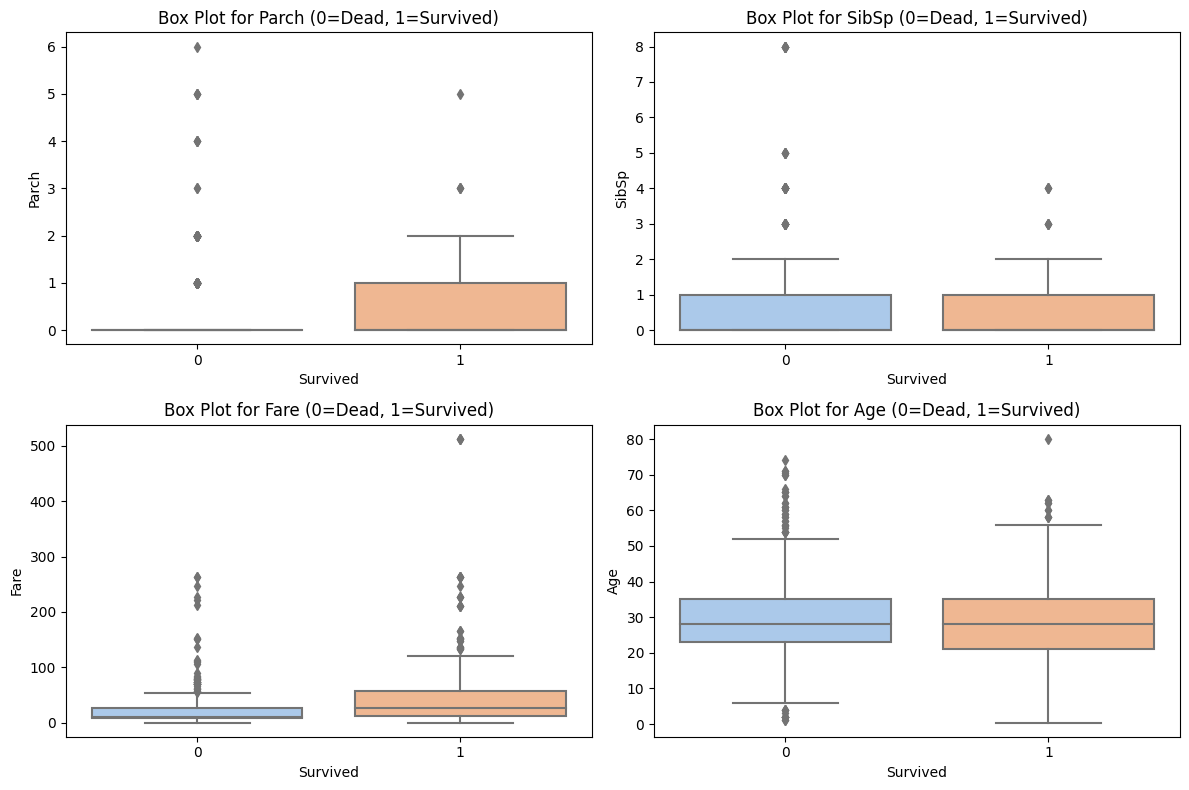

In [ ]:
# Handling Misisng Values and Outliers
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Step 7: Visualizing the distribution of 'Parch', 'SibSp', 'Fare', and 'Age' for Survived vs. Dead people
plt.figure(figsize=(12, 8))
variables = ['Parch', 'SibSp', 'Fare', 'Age']

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Survived', y=var, data=df, palette='pastel')
    plt.title(f'Violin Plot for {var} (0=Dead, 1=Survived)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Survived', y=var, data=df, palette='pastel')
    plt.title(f'Box Plot for {var} (0=Dead, 1=Survived)')

plt.tight_layout()
plt.show()


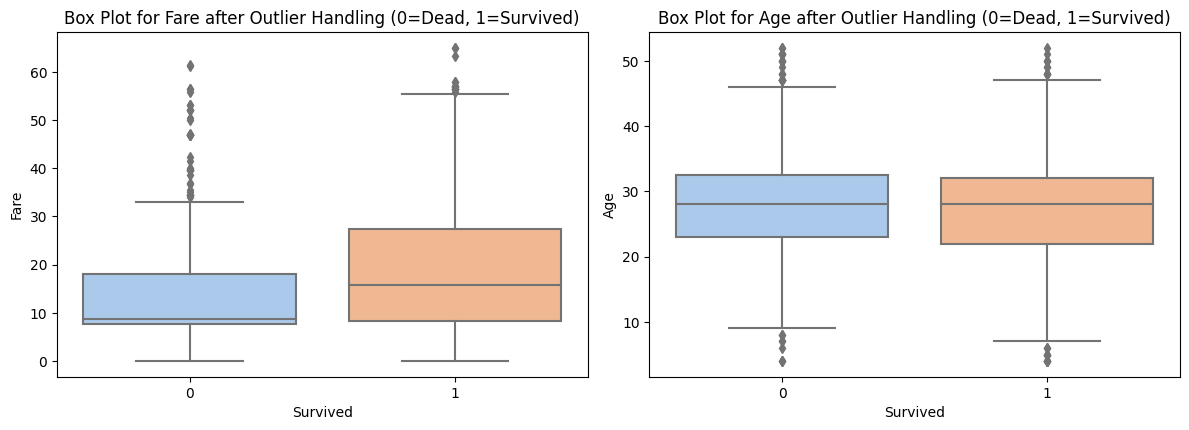

In [ ]:

# Step 8: Handling outliers using the Interquartile Range (IQR) method
variables = ['Fare', 'Age']
def remove_outliers_iqr(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]

# Apply the IQR method to remove outliers
for var in variables:
    df = remove_outliers_iqr(df, var)

# Step 9: Visualizing the results after handling outliers
plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Survived', y=var, data=df, palette='pastel')
    plt.title(f'Box Plot for {var} after Outlier Handling (0=Dead, 1=Survived)')

plt.tight_layout()
plt.show()


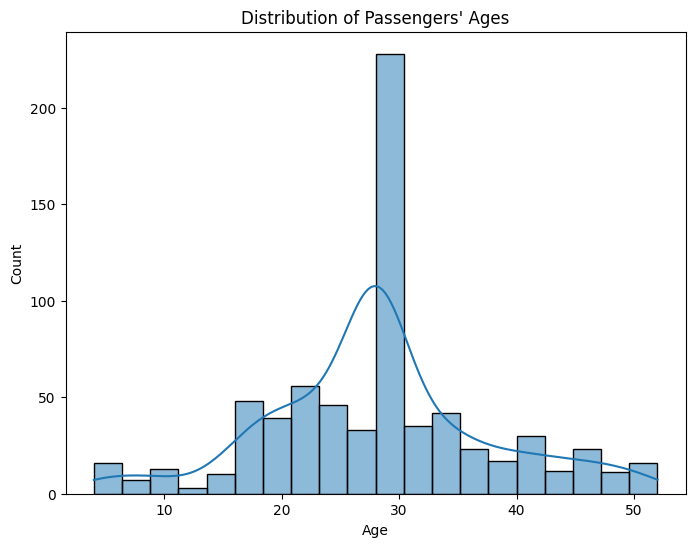

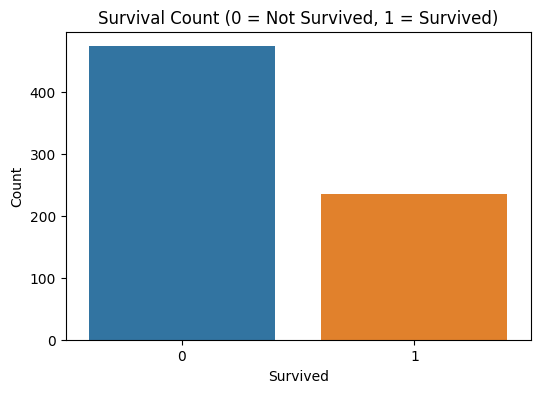

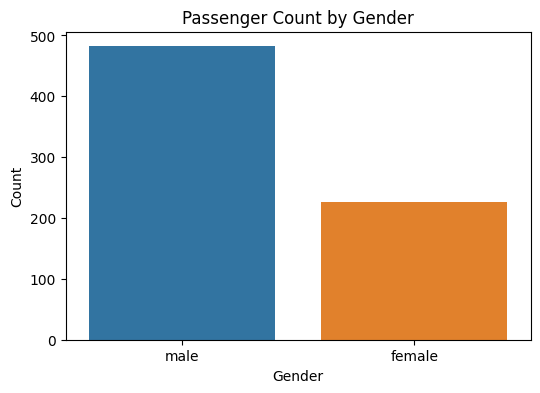

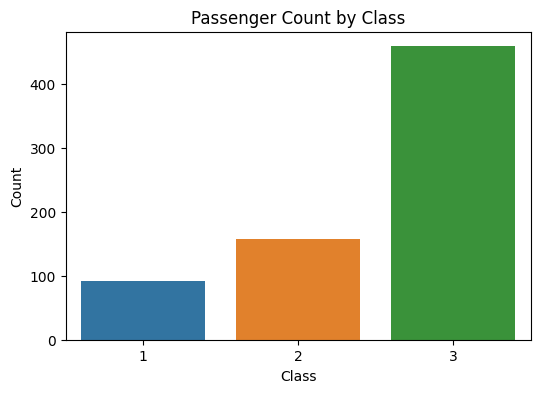

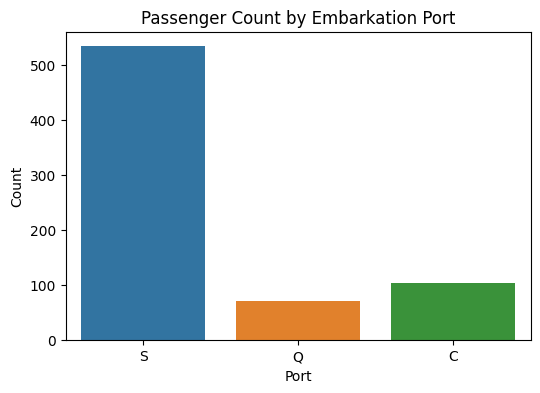

In [ ]:
# Plot the distribution of passengers' ages
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Passengers\' Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plot the count of passengers who survived vs. who did not survive
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plot the count of passengers based on gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df)
plt.title('Passenger Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Plot the count of passengers based on passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Plot the count of passengers based on embarkation port
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=df)
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

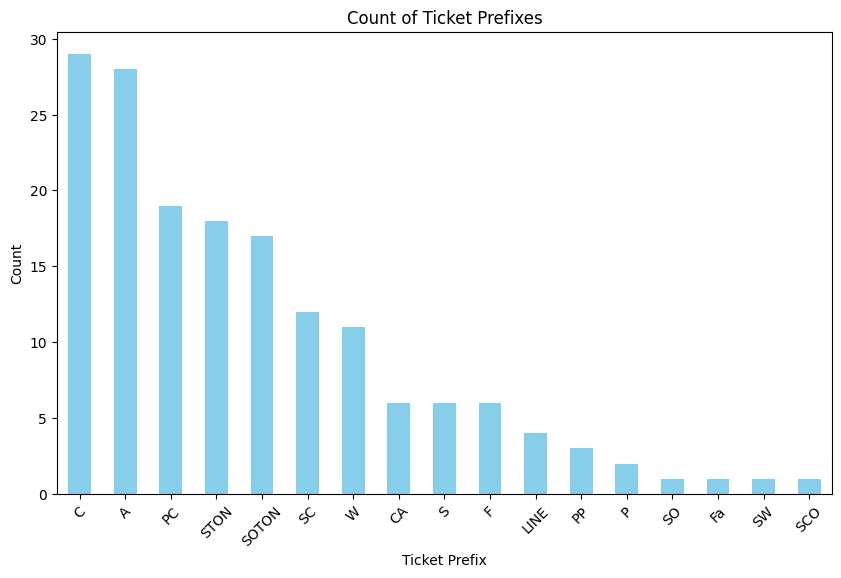

In [ ]:
# Extracting ticket prefixes from the 'Ticket' column
df['TicketPrefix'] = df['Ticket'].str.extract(r'([A-Za-z]+)')

# Plotting the count of different ticket prefixes
plt.figure(figsize=(10, 6))
df['TicketPrefix'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Ticket Prefixes')
plt.xlabel('Ticket Prefix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


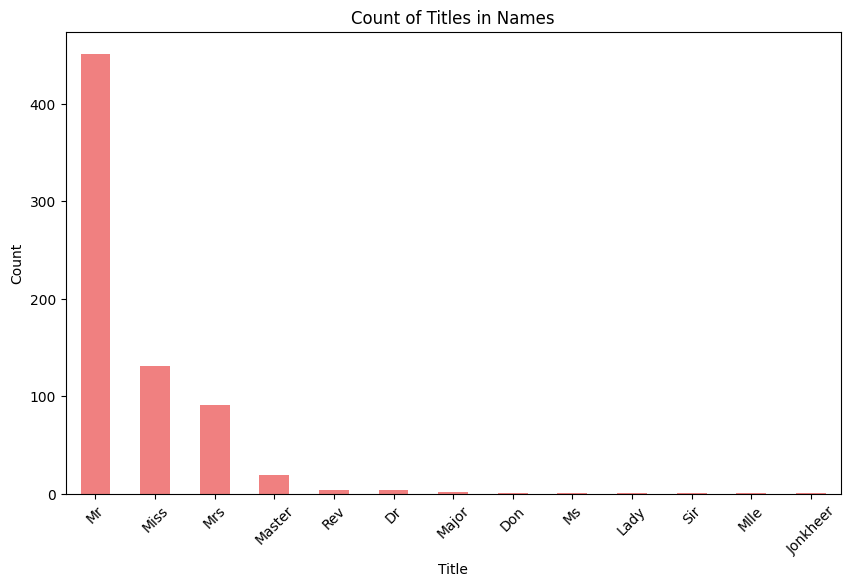

In [ ]:
# Extracting titles using regular expressions
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')

# Plotting the count of each title
plt.figure(figsize=(10, 6))
df['Title'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Count of Titles in Names')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


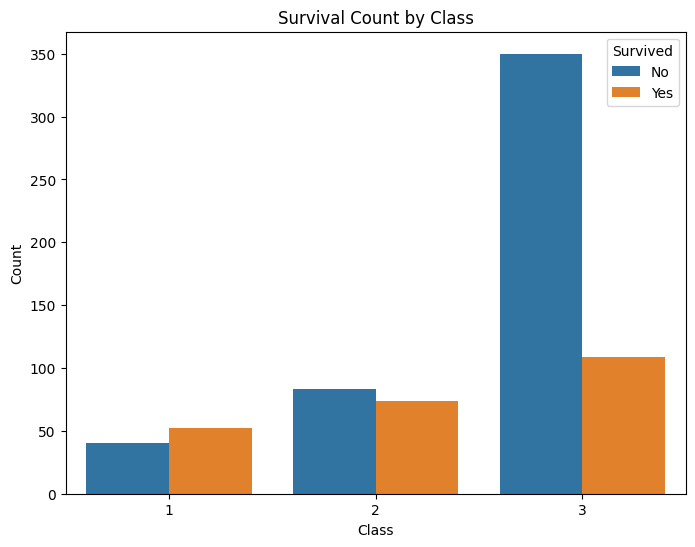

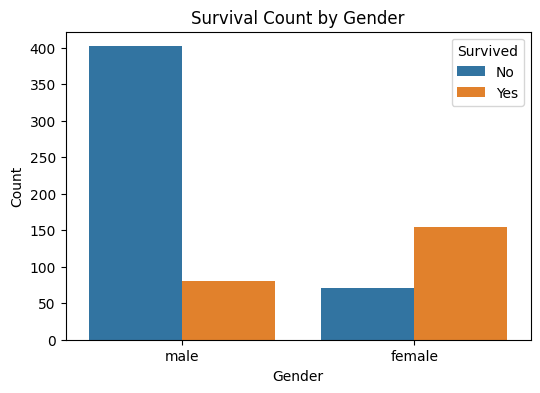

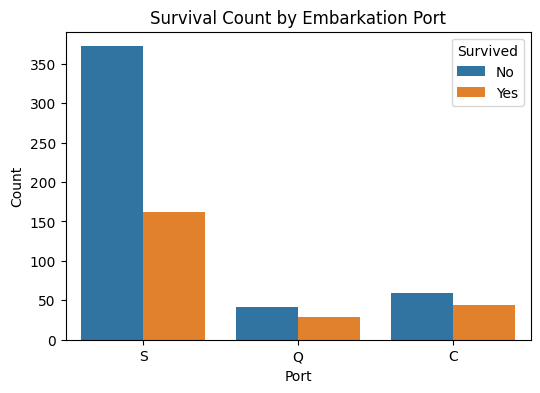

In [ ]:
# Plot the count of passengers who survived or not based on their class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Plot the count of passengers who survived or not based on their gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Plot the count of passengers who survived or not based on their embarkation port
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


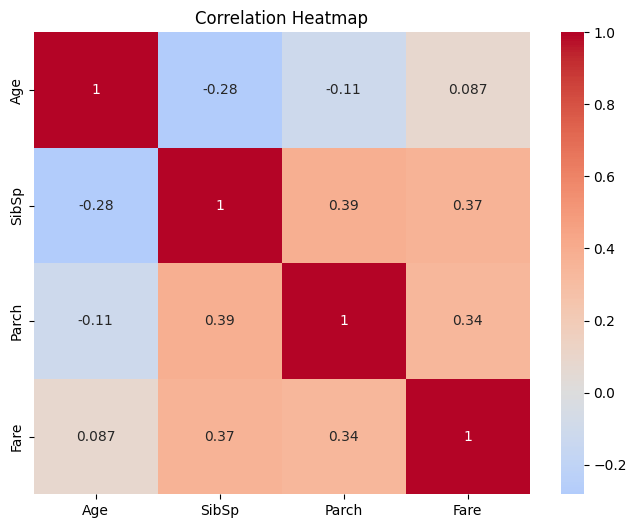

In [ ]:
# Selecting only numerical columns for correlation heatmap
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


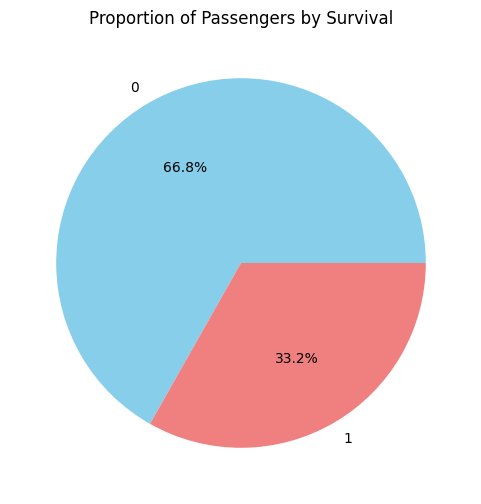

<ipython-input-13-77803d712b09>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='Fare', data=df, estimator='mean', ci=None)


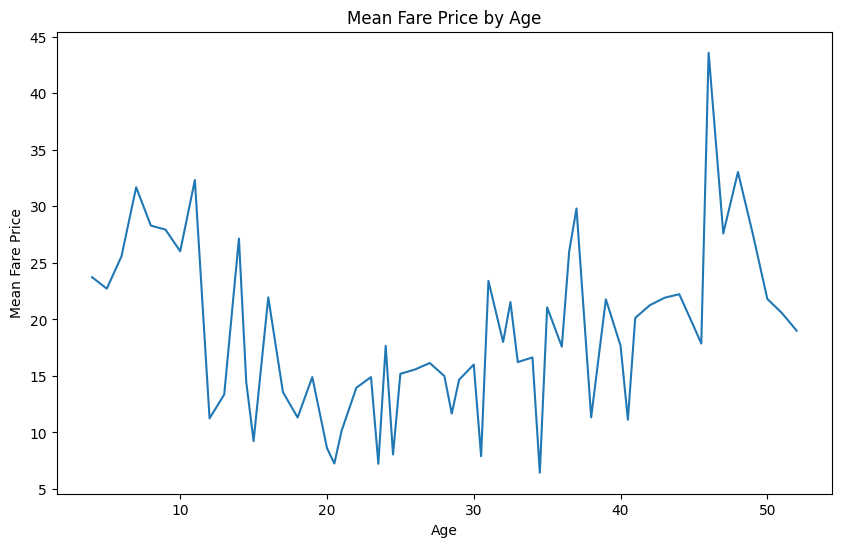

NameError: ignored

<Figure size 600x400 with 0 Axes>

In [ ]:
# Pie chart for the proportion of passengers who survived or not
plt.figure(figsize=(6, 6))
df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Passengers by Survival')
plt.ylabel('')
plt.show()

# Line plot for the distribution of fare prices
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Fare', data=df, estimator='mean', ci=None)
plt.title('Mean Fare Price by Age')
plt.xlabel('Age')
plt.ylabel('Mean Fare Price')
plt.show()

# Q-Q plot to check the normality of the 'Age' column
plt.figure(figsize=(6, 4))
stats.probplot(df['Age'].dropna(), dist='norm', plot=plt)
plt.title('Q-Q Plot for Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


In this step, we created three additional visualizations:

A pie chart to show the proportion of passengers who survived or not. This provides a quick overview of the overall survival rate in the dataset.

A line plot to visualize the relationship between age and fare prices. The line plot displays the mean fare price for each age group, giving us an idea of how fare prices vary with age.

A Q-Q plot (Quantile-Quantile plot) to check the normality of the 'Age' column. The Q-Q plot compares the distribution of the 'Age' data against the theoretical normal distribution. If the points lie roughly along a straight line, it suggests that the data is approximately normally distributed.

In [ ]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Step 10: Create the contingency table
contingency_table = pd.crosstab(df['Pclass'], df['Survived'], margins=True)

# Add row and column totals
contingency_table.loc['Total'] = contingency_table.sum()
contingency_table['Total'] = contingency_table.sum(axis=1)

contingency_table


Survived,0,1,All,Total
Pclass,,,,
2,14,7,21,42
3,209,57,266,532
All,223,64,287,574
Total,446,128,574,1148


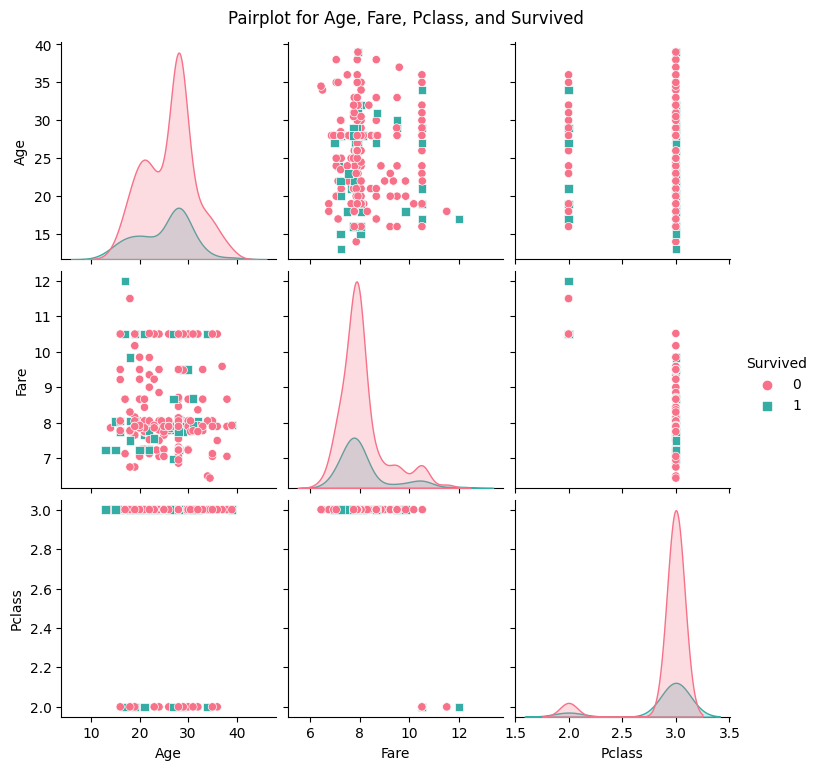

In [ ]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Step 11: Create the pairplot for 'Age', 'Fare', 'Pclass', and 'Survived'
important_columns = ['Age', 'Fare', 'Pclass', 'Survived']
df_subset = df[important_columns].copy()

sns.pairplot(df_subset, hue='Survived', diag_kind='kde', markers=["o", "s"], palette='husl')
plt.suptitle('Pairplot for Age, Fare, Pclass, and Survived', y=1.02)
plt.show()


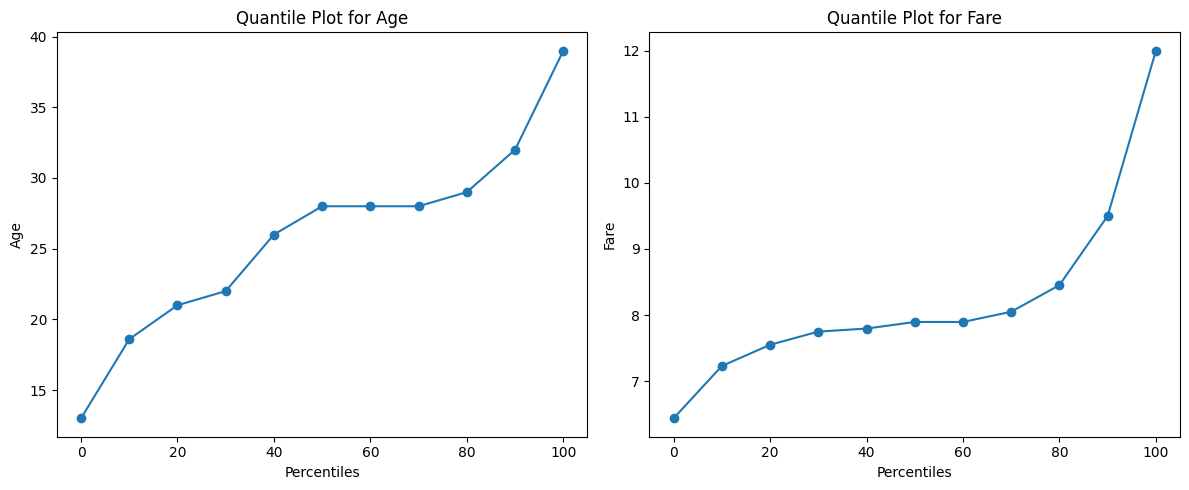

In [ ]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Step 10: Create the quantile plot for 'Age' and 'Fare'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
age_quantiles = np.percentile(df['Age'], np.arange(0, 101, 10))
plt.plot(np.arange(0, 101, 10), age_quantiles, marker='o')
plt.xlabel('Percentiles')
plt.ylabel('Age')
plt.title('Quantile Plot for Age')

plt.subplot(1, 2, 2)
fare_quantiles = np.percentile(df['Fare'], np.arange(0, 101, 10))
plt.plot(np.arange(0, 101, 10), fare_quantiles, marker='o')
plt.xlabel('Percentiles')
plt.ylabel('Fare')
plt.title('Quantile Plot for Fare')

plt.tight_layout()
plt.show()


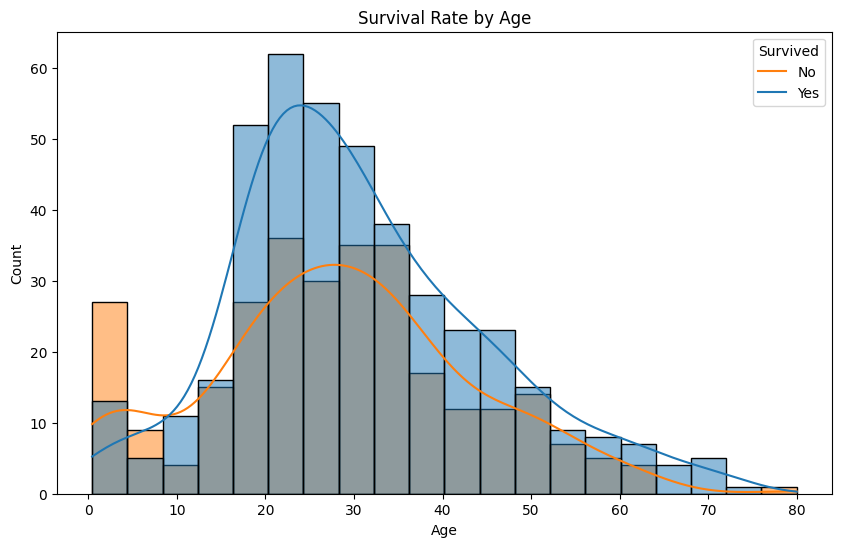

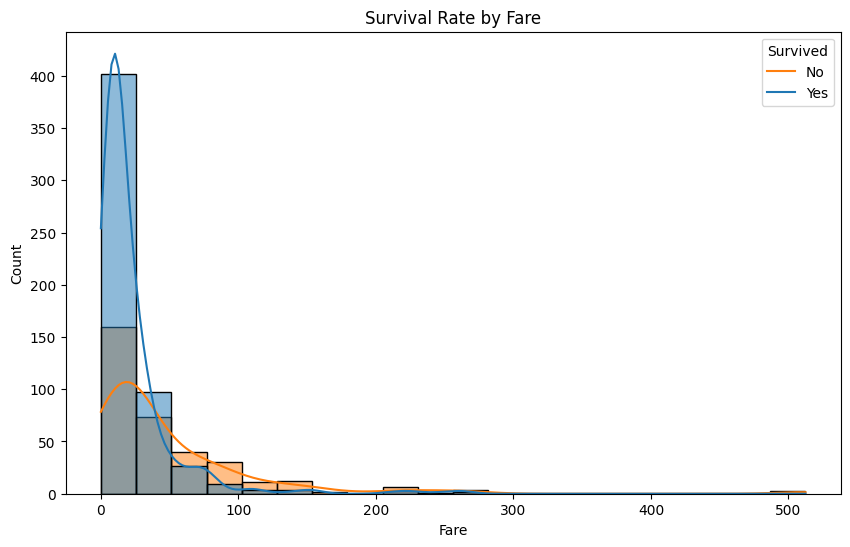

In [ ]:
# Plot the survival rate by age group
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=df, hue='Survived', bins=20, kde=True)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Plot the survival rate by fare price
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', data=df, hue='Survived', bins=20, kde=True)
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# New section

In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#In order to see all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('/content/Telco-Customer-Churn_EDA.csv', encoding='latin-1')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df1 = df.copy()
df1.drop(['customerID'], axis=1, inplace = True)
df1 = df1.dropna()
df1.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [4]:
#Label Encoding
df1['Partner'] = df1['Partner'].replace({'Yes': 1, 'No': 0})
df1['Dependents'] = df1['Dependents'].replace({'Yes': 1, 'No': 0})
df1['PhoneService'] = df1['PhoneService'].replace({'Yes': 1, 'No': 0})
df1['InternetService'] = df1['InternetService'].replace({'Yes': 1, 'No': 0})
df1['OnlineSecurity'] = df1['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': -1})
df1['OnlineBackup'] = df1['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': -1})
df1['DeviceProtection'] = df1['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': -1})
df1['TechSupport'] = df1['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': -1})
df1['StreamingTV'] = df1['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': -1})
df1['StreamingMovies'] = df1['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': -1})
df1['PaperlessBilling'] = df1['PaperlessBilling'].replace({'Yes': 1, 'No': 0})

#One Hot Encoding
encoded_df = pd.get_dummies(df1, columns=['gender','MultipleLines','InternetService','Contract','PaymentMethod'])

#Making the Header Uniform
encoded_df.columns = encoded_df.columns.str.replace(' ','_')
encoded_df.columns = encoded_df.columns.str.replace('-','_')
encoded_df['TotalCharges']= encoded_df['TotalCharges'].replace(' ', pd.NA)
encoded_df = encoded_df.dropna()
encoded_df['TotalCharges']= encoded_df['TotalCharges'].astype('float64')
encoded_df.head(1)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_0,InternetService_DSL,InternetService_Fiber_optic,Contract_Month_to_month,Contract_One_year,Contract_Two_year,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,0,1,0,0,1,0,0,0,0,1,29.85,29.85,No,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [5]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   OnlineSecurity                           7032 non-null   int64  
 6   OnlineBackup                             7032 non-null   int64  
 7   DeviceProtection                         7032 non-null   int64  
 8   TechSupport                              7032 non-null   int64  
 9   StreamingTV                              7032 non-null   int64  
 10  StreamingMovies                          7032 no

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("The initial Prediction Accuracy")
print(f"Accuracy: {accuracy}")

The initial Prediction Accuracy
Accuracy: 0.7192608386638237


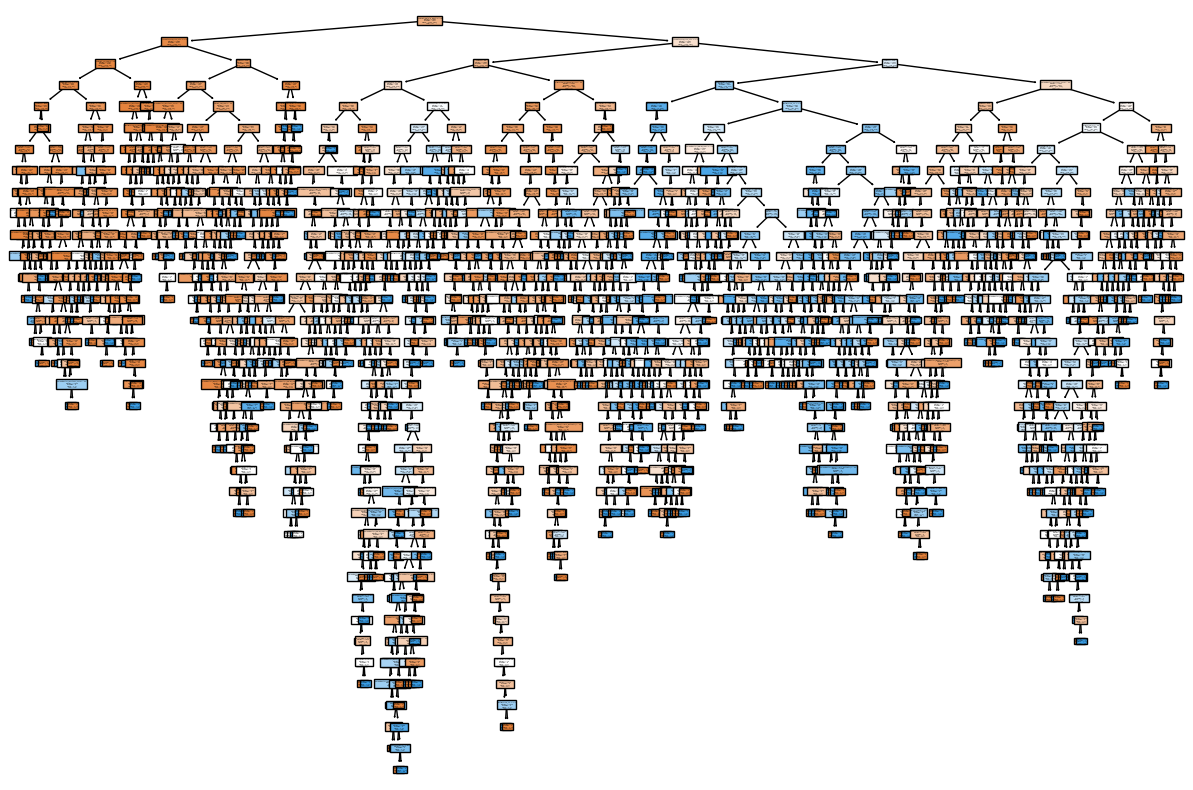

In [7]:
from sklearn.tree import plot_tree

X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [8]:
#Using Hyperparameter Tuning to improve the performance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters and their potential values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("The Tuned Model's Prediction Accuracy:")
print(f"Accuracy: {accuracy}")
print("Best Hyperparameters:")
print(best_params)

The Tuned Model's Prediction Accuracy:
Accuracy: 0.7604832977967306
Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


Original Accuracy before pruning: 0.73
The Tuned Model's Prediction Accuracy:
Accuracy After Hyperparameter Tuning: 0.7562189054726368
Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy after pruning: 0.79


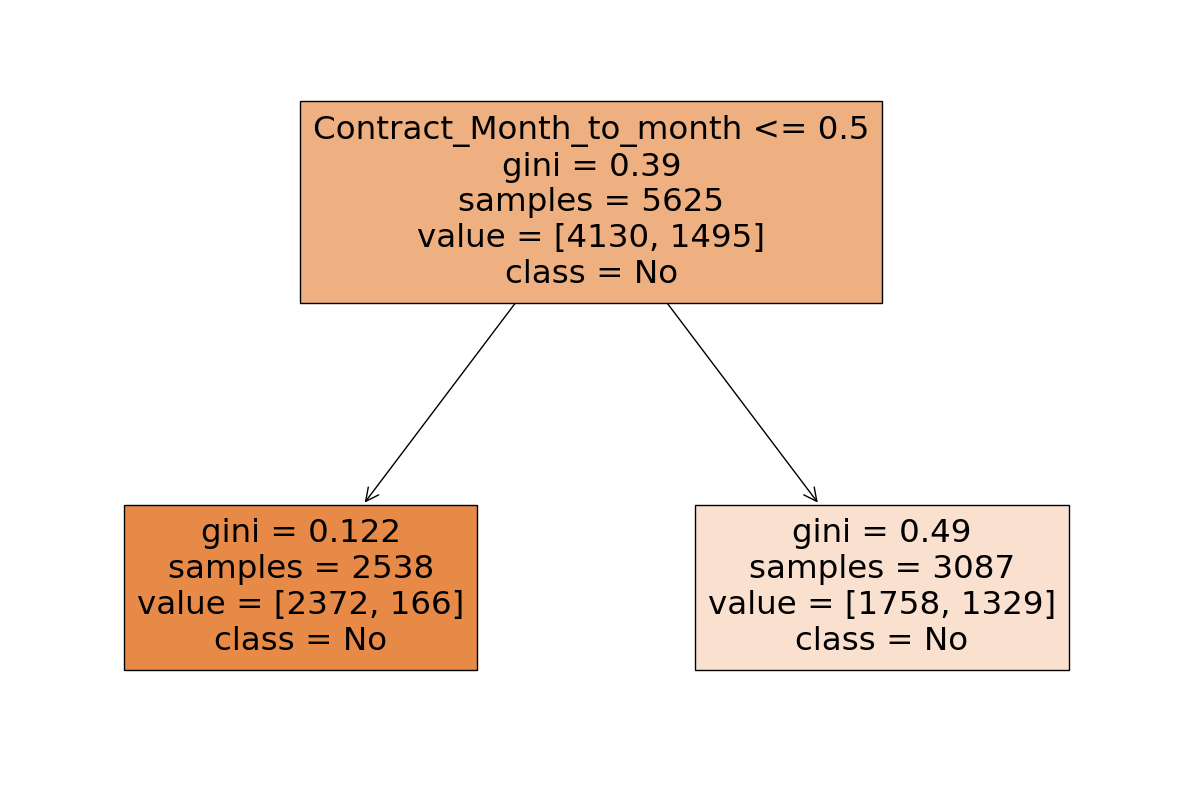

Thus we see the pruing is causing the tree to stop growing and we get the head of the tree only!


In [9]:
#Post Pruning
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree without pruning
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the decision tree on the validation set
accuracy_before_pruning = clf.score(X_validation, y_validation)
print(f"Original Accuracy before pruning: {accuracy_before_pruning:.2f}")

# Define hyperparameters and their potential values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("The Tuned Model's Prediction Accuracy:")
print(f"Accuracy After Hyperparameter Tuning: {accuracy}")
print("Best Hyperparameters:")
print(best_params)

# Apply cost-complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Find the optimal alpha based on cross-validation
validation_accuracies = [clf.score(X_validation, y_validation) for clf in clfs] #0.79
optimal_alpha = ccp_alphas[validation_accuracies.index(max(validation_accuracies))]
# optimal_alpha = ccp_alphas[validation_accuracies.index(0.7256574271499645)]

# Train a pruned decision tree with the optimal alpha
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_clf.fit(X_train, y_train)

# Evaluate the pruned decision tree on the validation set
accuracy_after_pruning = pruned_clf.score(X_validation, y_validation)
print(f"Accuracy after pruning: {accuracy_after_pruning:.2f}")

# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

print('Thus we see the pruing is causing the tree to stop growing and we get the head of the tree only!')

After Pruning: Validation accuracy: 0.79


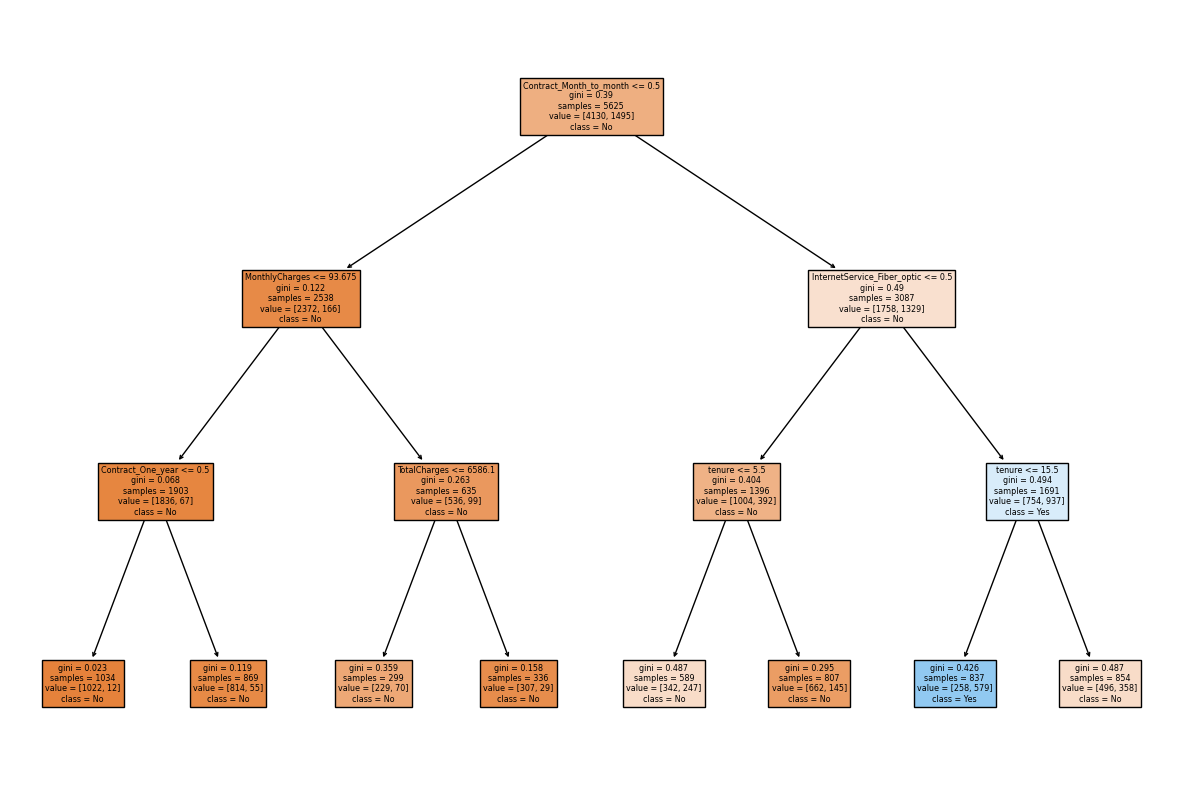

In [10]:
#Pre-Pruning
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree with pre-pruning
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=20, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the decision tree on the validation set
accuracy = clf.score(X_validation, y_validation)
print(f"After Pruning: Validation accuracy: {accuracy:.2f}")

# Plot the pre-pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

Conclusion:

Thus we see the importannt columns are:
* Contract Month to month,MonthlyChanges, InternetServices_Fiber_optics, tenure, Contract_One_year,TotalCharges
* Contract with Month to Month is highest priority!
* if charges of monthly is acceptable then they check for yearly contract
* if charges of monthly is not acceptable then they check the total charges they pay on yearly bases to stay
* if the monthly charges are not acceptable they check for fiber optics Internet services
* if they are ok with internet services they check for tenure
* if not ok, they tend to generally beleieve in getting churned!


Hence:

The **only way** people can get ***churned out*** if the customers are not happy with **month to month contract** and there is no use **Fiber Optics** and tenured **less than 16 months**!!!

The Tuned Model's Prediction Accuracy:
Accuracy: 0.7562189054726368
Best Hyperparameters:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


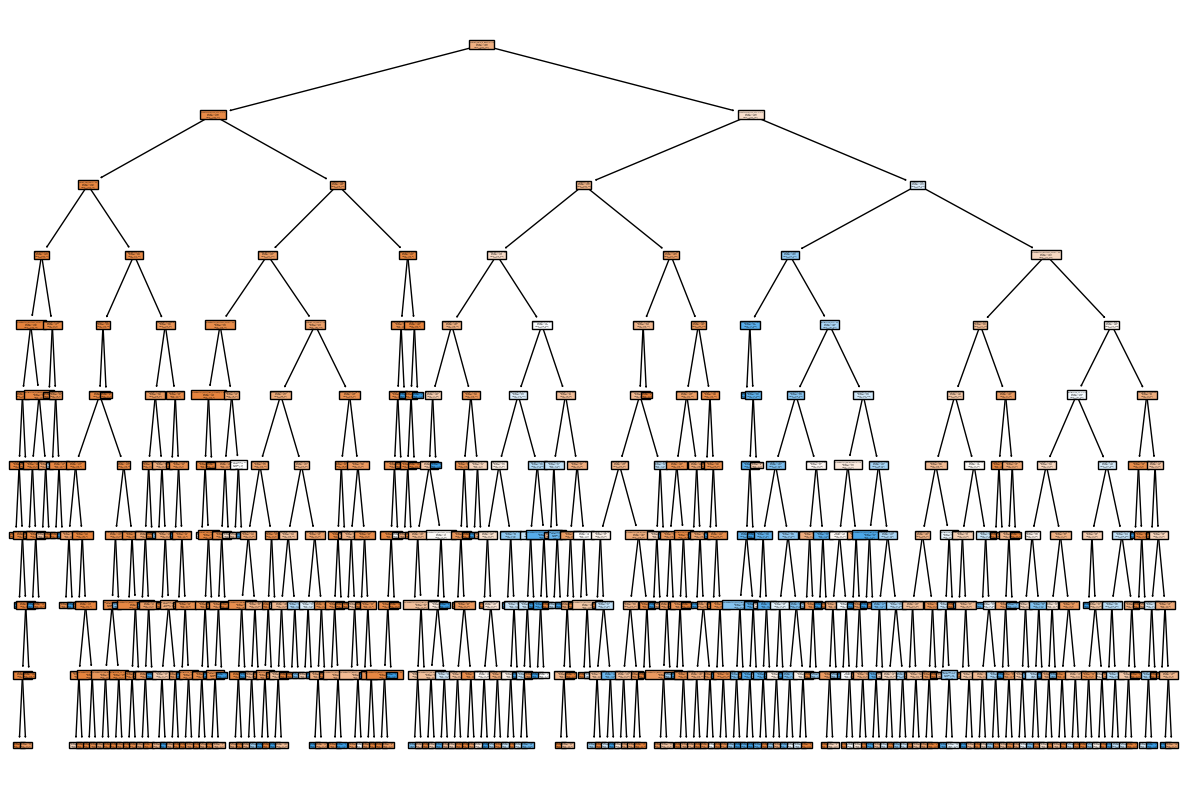

In [ ]:
#Using Hyperparameter Tuning to improve the performance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters and their potential values for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create an instance of DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("The Tuned Model's Prediction Accuracy:")
print(f"Accuracy: {accuracy}")
print("Best Hyperparameters:")
print(best_params)

X = encoded_df.drop('Churn', axis=1)
y = encoded_df['Churn']

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 10)
clf.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

Accuracy before pruning: 0.75
Accuracy after pruning: 0.79


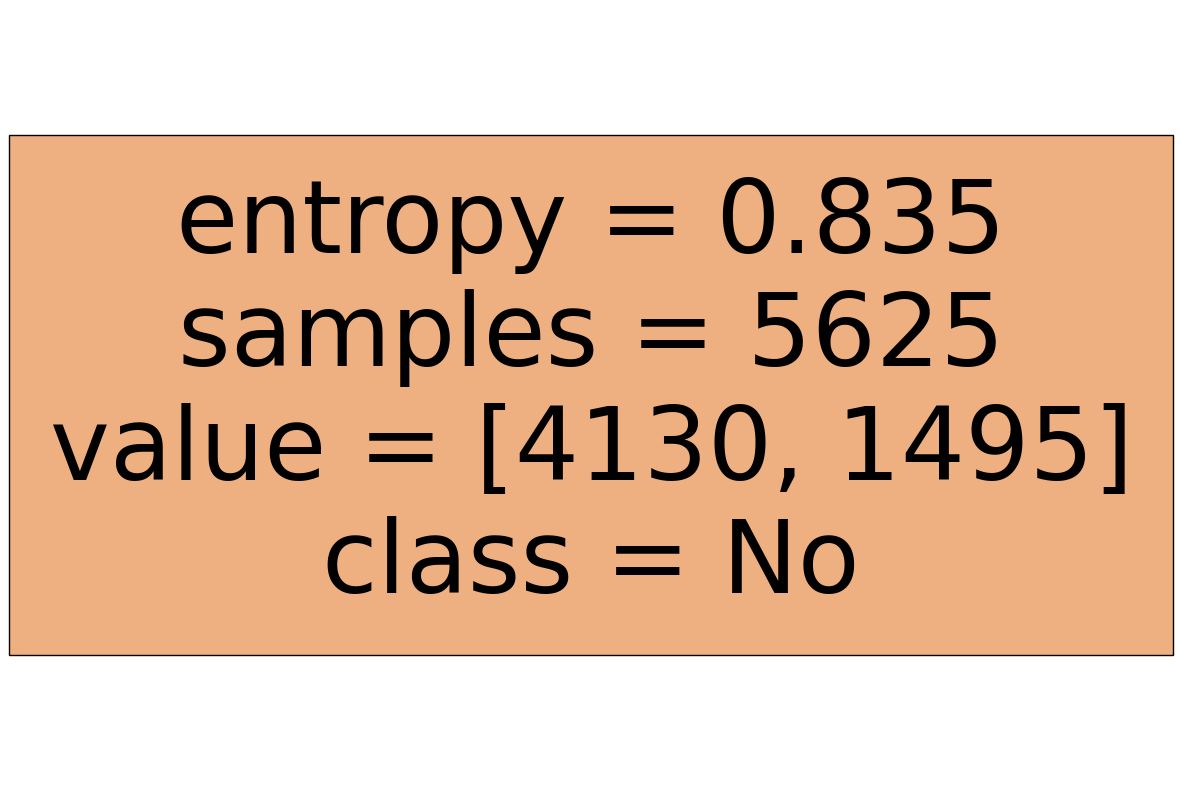

In [ ]:
#Post Pruning
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree without pruning
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 10)
clf.fit(X_train, y_train)

# Evaluate the decision tree on the validation set
accuracy_before_pruning = clf.score(X_validation, y_validation)
print(f"Accuracy before pruning: {accuracy_before_pruning:.2f}")

# Apply cost-complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, criterion='entropy', max_depth= 10, min_samples_leaf= 1, min_samples_split= 10)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Find the optimal alpha based on cross-validation
validation_accuracies = [clf.score(X_validation, y_validation) for clf in clfs] #0.79
optimal_alpha = ccp_alphas[validation_accuracies.index(max(validation_accuracies))]
# optimal_alpha = ccp_alphas[validation_accuracies.index(0.7256574271499645)]

# Train a pruned decision tree with the optimal alpha
pruned_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_alpha)
pruned_clf.fit(X_train, y_train)

# Evaluate the pruned decision tree on the validation set
accuracy_after_pruning = pruned_clf.score(X_validation, y_validation)
print(f"Accuracy after pruning: {accuracy_after_pruning:.2f}")

# Plot the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

After Pruning: Validation accuracy: 0.75


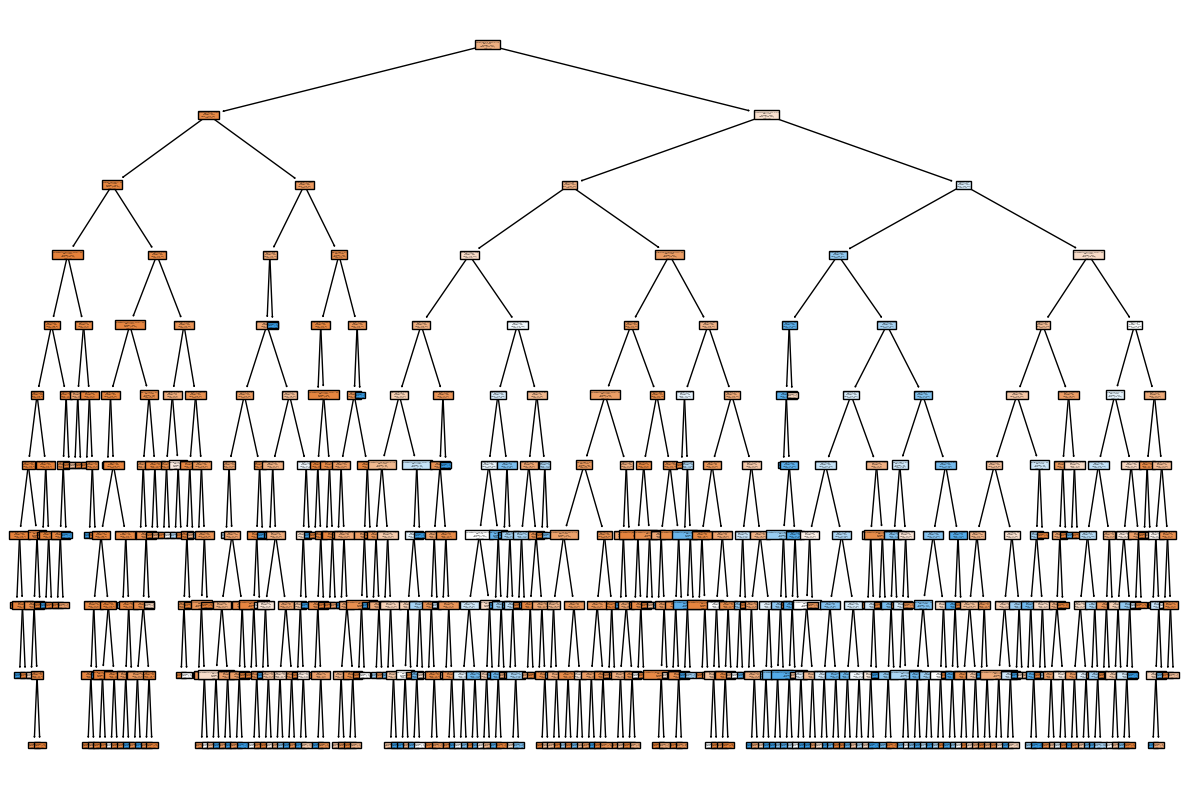

In [ ]:
#Pre-Pruning
# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree with pre-pruning
clf = DecisionTreeClassifier(random_state=42, max_depth= 10, min_samples_leaf= 1, min_samples_split= 10)
clf.fit(X_train, y_train)

# Evaluate the decision tree on the validation set
accuracy = clf.score(X_validation, y_validation)
print(f"After Pruning: Validation accuracy: {accuracy:.2f}")

# Plot the pre-pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()